<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [9]:
import pandas as pd

# Linear Regression

In [10]:
df = pd.read_csv('/content/drive/MyDrive/covid_impact_on_airport_traffic.csv')

In [11]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


I will try to predict PercentOfBaseline	column so therefore its Regression 

The AggregationMethod, Date and Version are the same throught out the whole data set so they are useless. Droping them is one logical step :D

In [12]:
df.drop(['Version','AggregationMethod','Date'],axis=1,inplace=True)

In [13]:
df

,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...
7242,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [14]:
df['Geography'].value_counts().count()

28

 Needs some encoding for the basic models so i will use label encoder , taking account there are aproximately 27 different classes for each column

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
l_encoder = LabelEncoder()

In [17]:
df['AirportName'] = l_encoder.fit_transform(df['AirportName'])

In [18]:
df['Centroid'] = l_encoder.fit_transform(df['Centroid'])

In [19]:
df['City'] = l_encoder.fit_transform(df['City'])

In [20]:
df['State'] = l_encoder.fit_transform(df['State'])

In [21]:
df['ISO_3166_2'] = l_encoder.fit_transform(df['ISO_3166_2'])

In [22]:
df['Country'] = l_encoder.fit_transform(df['Country'])

In [23]:
df['Geography'] = l_encoder.fit_transform(df['Geography'])

In [24]:
df

,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,13,64,27,24,13,0,0,27
1,13,29,27,24,13,0,0,27
2,13,54,27,24,13,0,0,27
3,13,18,27,24,13,0,0,27
4,13,22,27,24,13,0,0,27
...,...,...,...,...,...,...,...,...
7242,23,80,5,22,22,22,3,5
7243,23,55,5,22,22,22,3,5
7244,23,76,5,22,22,22,3,5
7245,23,69,5,22,22,22,3,5


In [25]:
import seaborn as sns

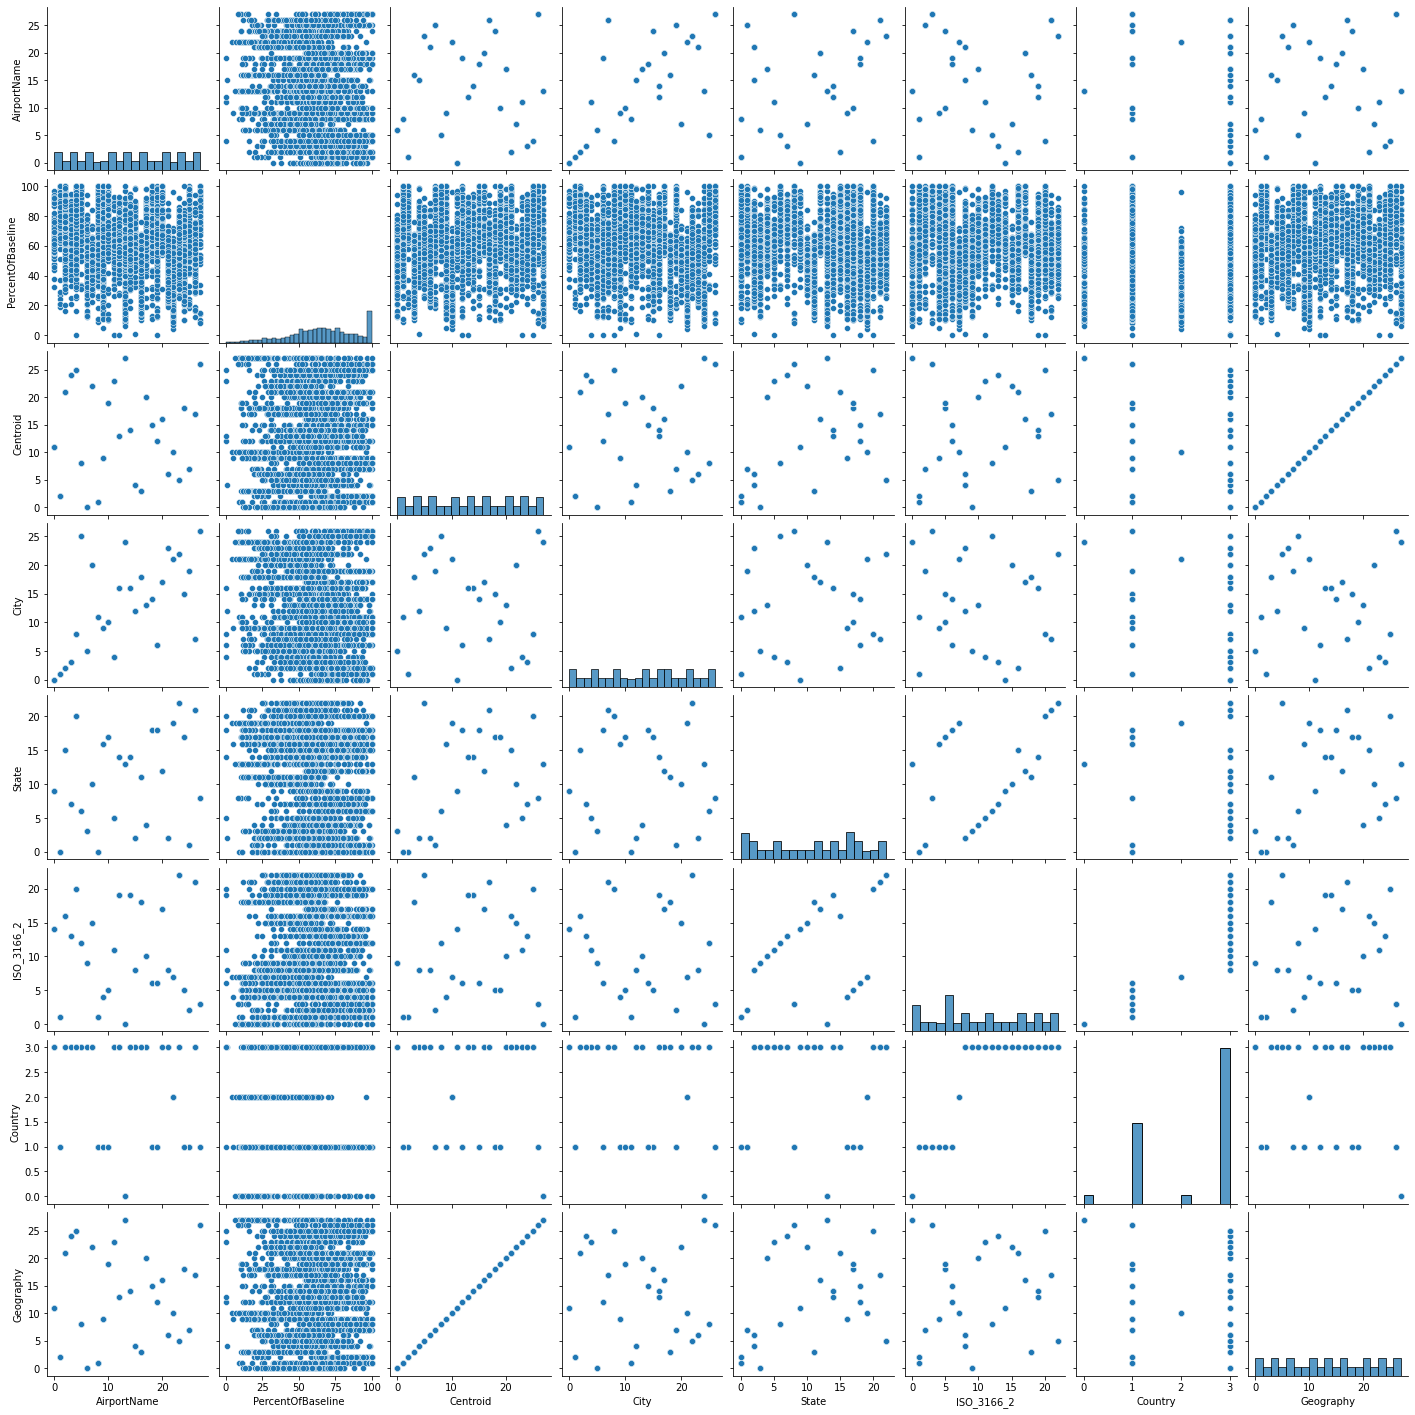

In [26]:
sns.pairplot(df)

As we can see from the pairplot PercentOfBaseline does not have any linear dependencies with any other feature so going with Linear Regression is not the best way but i will do it just for the purpose of this exercise

In [27]:
df_without_target = df.drop(['PercentOfBaseline'],axis=1)

In [28]:
df_without_target

,AirportName,Centroid,City,State,ISO_3166_2,Country,Geography
0,13,27,24,13,0,0,27
1,13,27,24,13,0,0,27
2,13,27,24,13,0,0,27
3,13,27,24,13,0,0,27
4,13,27,24,13,0,0,27
...,...,...,...,...,...,...,...
7242,23,5,22,22,22,3,5
7243,23,5,22,22,22,3,5
7244,23,5,22,22,22,3,5
7245,23,5,22,22,22,3,5


In [29]:
target = df['PercentOfBaseline']

In [30]:
target

0       64
1       29
2       54
3       18
4       22
        ..
7242    80
7243    55
7244    76
7245    69
7246    68
Name: PercentOfBaseline, Length: 7247, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df_without_target,  target, test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [35]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.09200630315037639


In [36]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([48.7189818, 68.0314818, 72.0314818, ..., 56.9064818, 65.5549193,
       64.2814818])

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(Y_test, Y_pred_lin)

0.08650244611317148

As we can see the result is terible

# Decission Tree

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df_without_target, target, test_size=0.2)

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_test)

In [42]:
r2_score(Y_test, y_pred)

0.5019061819094159

As we can see the result is much better using DecisionTreeRegressor

In [43]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


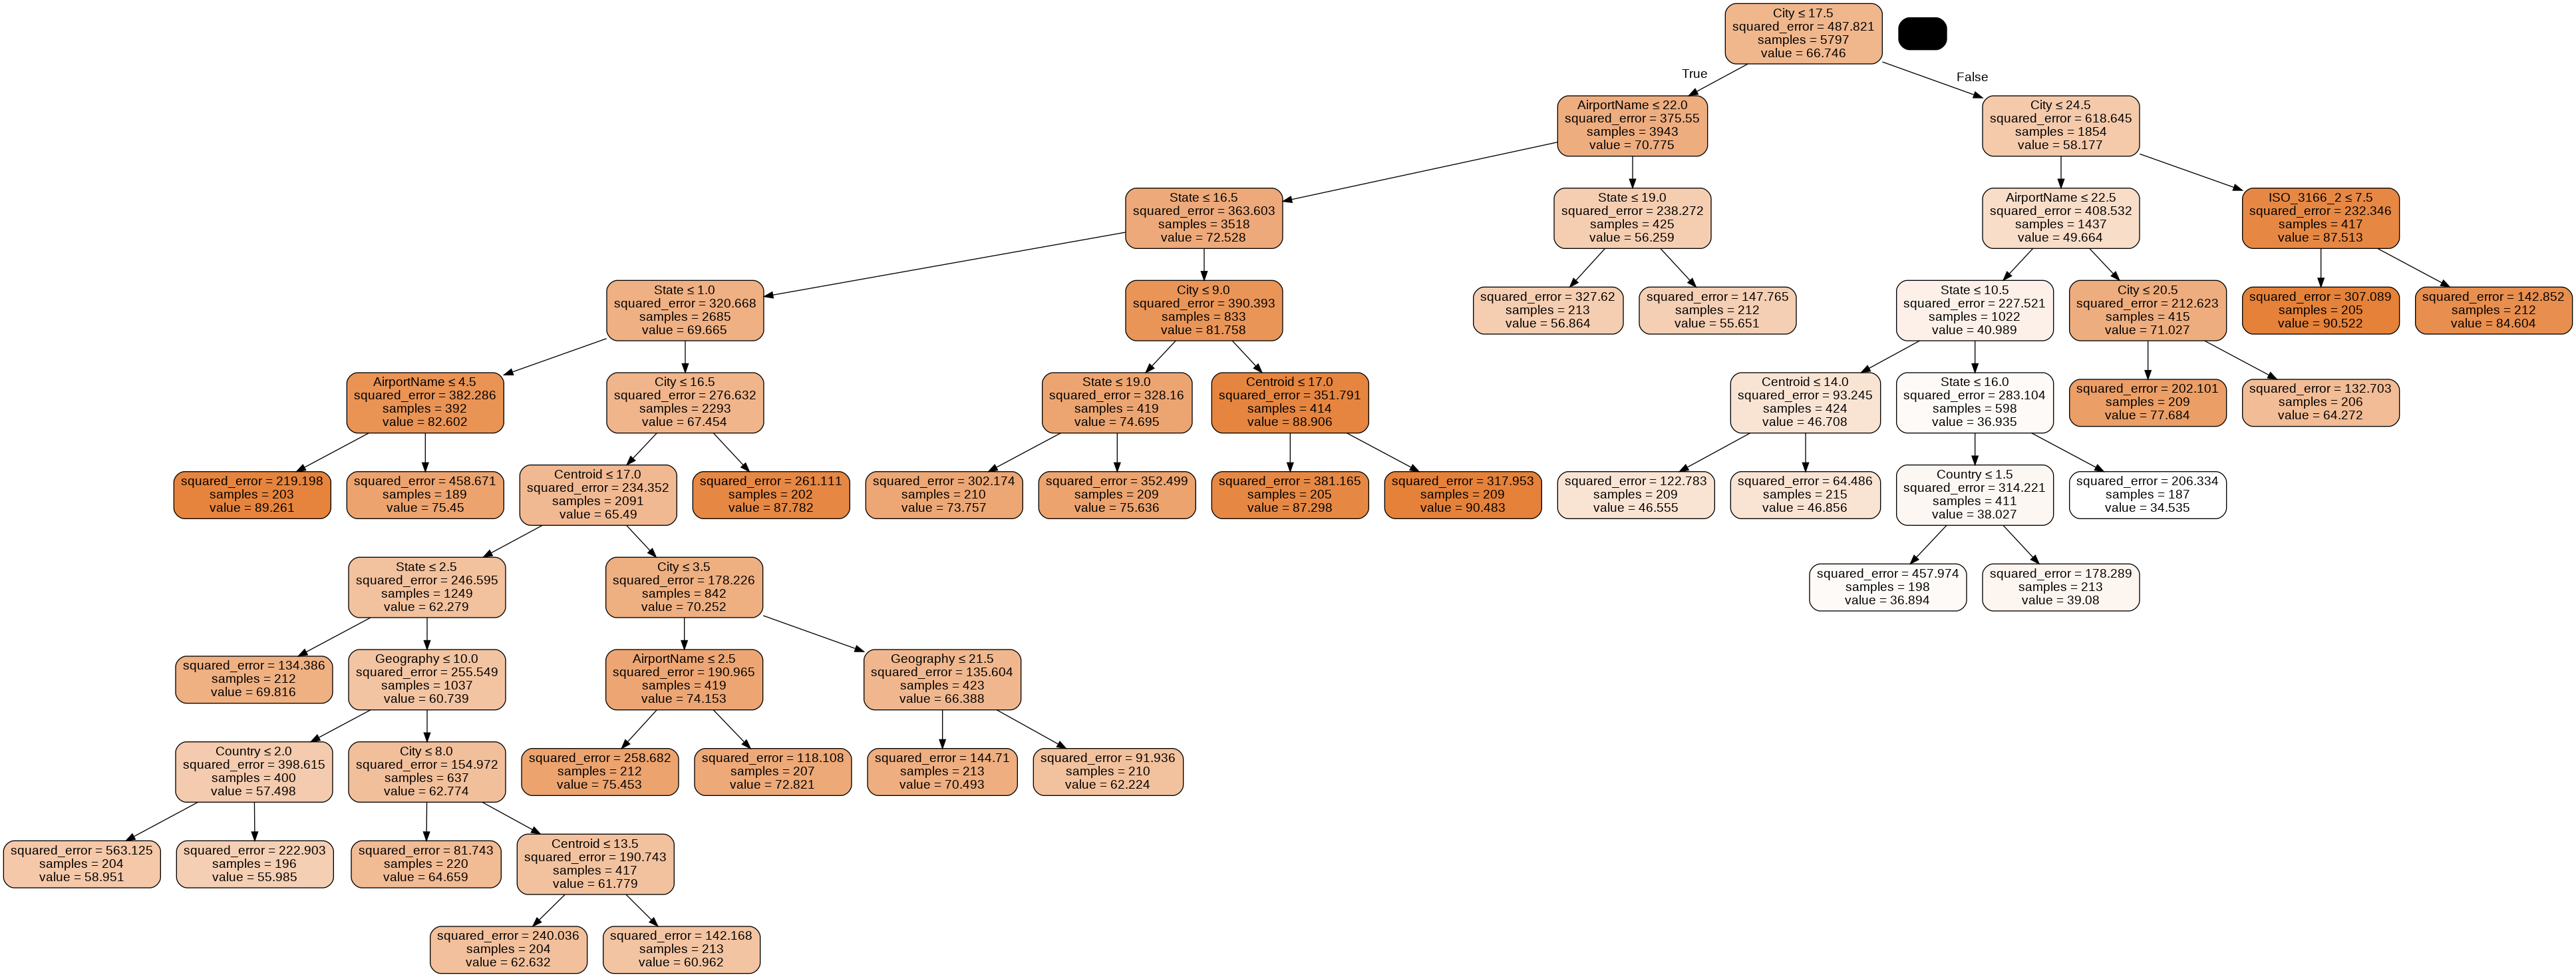

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=df_without_target.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [45]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from tpot import TPOTRegressor

In [47]:
pipeline_optimizer = TPOTRegressor()

In [48]:
pipeline_optimizer = TPOTRegressor(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [49]:
pipeline_optimizer.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -235.31006253732366

Generation 2 - Current best internal CV score: -235.31006253732366

Generation 3 - Current best internal CV score: -235.31006253732366

Generation 4 - Current best internal CV score: -235.31006253732366

Generation 5 - Current best internal CV score: -235.31006253732366

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)